In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Pauli, SparsePauliOp
import numpy as np 

In [ ]:
def Oracle_function(ckt, ftype):
    if ftype==0:
        pass
    elif ftype==1:
        ckt.x(1)
    elif ftype==2:
        ckt.cx(0,1)
    elif ftype==3:
        ckt.cx(0,1)
        ckt.x(1)

In [ ]:
def Quantumckt(ftype):
    ckt=QuantumCircuit(2,1)
    ckt.x(1)
    ckt.h([0, 1])
    Oracle_function(ckt, ftype)
    ckt.h(0)
    ckt.measure(0,0)

    return ckt

ftype=3
qc= Quantumckt(ftype)


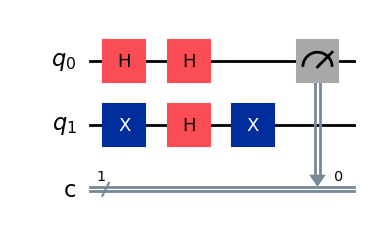

In [8]:
qc.draw(output="mpl")

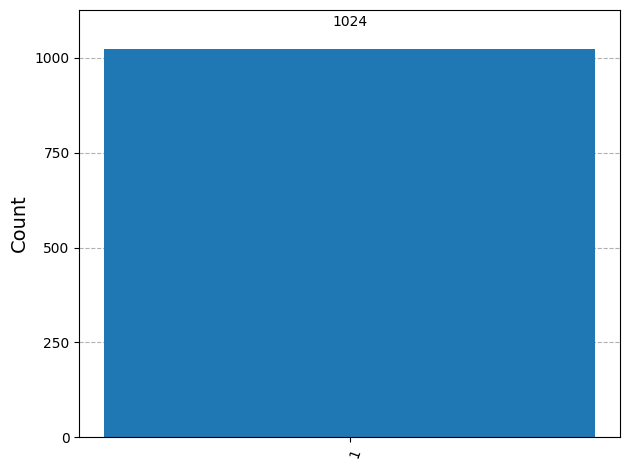

In [13]:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
service= QiskitRuntimeService(channel="ibm_cloud", 
                              token=".........",
                              instance="......")

In [73]:
backend_qc= service.backend(name="ibm_brisbane")

In [90]:
pm= generate_preset_pass_manager(optimization_level=1, backend=backend_qc)
transpilated_circuit= pm.run(qc)

In [91]:
sampler= Sampler(mode= backend_qc)

In [ ]:
job= sampler.run([transpilated_circuit])

In [95]:
job.status()

'DONE'

In [96]:
result= job.result()
print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-07-31 07:19:50', stop='2025-07-31 07:19:52', size=4096>)])}, 'version': 2})


{'0': 3781, '1': 315}


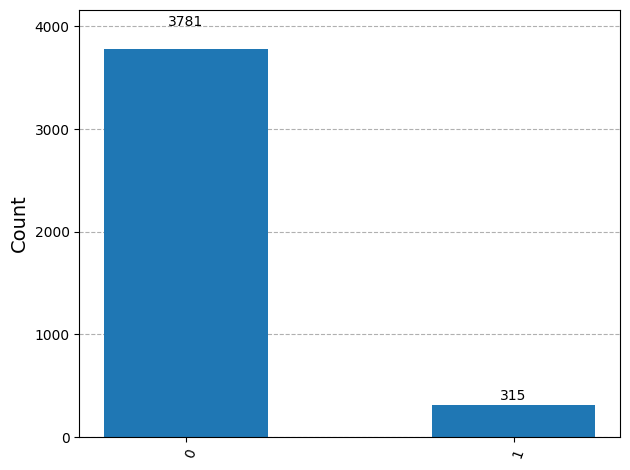

In [97]:
qc.cregs
counts= result[0].data['c'].get_counts()
print(counts)
plot_histogram(counts)